In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
#Pfad des Projekts
os.chdir('C:/Users/Basti/Documents/Projekt_Neuronale Netze/Traffic_Sign_mlp')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import  Dense, Flatten, Dropout

In [2]:
images = []
labels = []
#Classes: 43 Kennzeichen 
classes = 43
cur_path = os.getcwd()

In [3]:
cur_path

'C:\\Users\\Basti\\Documents\\Projekt_Neuronale Netze\\Traffic_Sign_mlp'

## Daten vorbereiten

In [4]:
#Image-Dateien werden in Data-Array gespeichert,Foldername(Klassenname) Label zugeordnet
# i = folder=label
for i in range(classes):
    path = os.path.join('C:/Users/Basti/Documents/Projekt_Neuronale Netze/Data_image/data','train',str(i))
    imagefolder = os.listdir(path)
    #Schleife geht Images der Folders durch und speichert Images in Daten und Klasssen(i) in labels
    for a in imagefolder:
        try:
            im = Image.open(path + '\\'+ a)
            im = im.resize((30,30))
            im = np.array(im)/255.0
            images.append(im)
            labels.append(i)
        except Exception as e:
            print(e)

## Daten in numpy arrays speichern

In [5]:
images = np.array(images)
labels = np.array(labels)

#os.mkdir('training')
#Data=images, target= labels(Klassen)
np.save('C:/Users/Basti/Documents/Projekt_Neuronale Netze/Traffic_Sign_mlp/training/data',images)
np.save('C:/Users/Basti/Documents/Projekt_Neuronale Netze/Traffic_Sign_mlp/training/target',labels)

# Daten laden

In [6]:
images=np.load('C:/Users/Basti/Documents/Projekt_Neuronale Netze/Traffic_Sign_mlp/training/data.npy')
labels=np.load('C:/Users/Basti/Documents/Projekt_Neuronale Netze/Traffic_Sign_mlp/training/target.npy')

In [7]:
#data(anzahl daten, Image size: wight,hight;3= color channels rgb),labels(Anzahl labels)
#39209 entspricht Anzahl der Testimages
print(images.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [8]:
# teilt Datensatz in 80% Training und 20% Testsets, x_train(anzahl images,Imagesize,3??)=Input, y=Labels)
#später beim Training relevant (x_train und y_train werden verglichen)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=0)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# konvertieren über onehot-encoding

In [10]:
#Labels werden in 43 Klassen konvertiert
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# MLP model erstellen

In [11]:
model = Sequential()
#inputlayer,  nodes,aktivierung,  input_shap
#flatten:MLP verwendet einfache Datenvektoren, Arrays, wenn man so will, mit den x-Werten eines jeden Eingabebildes versehen. Da unser Bild eine 32x32-Matrix ist, müssen wir es in einen abgeflachten Vektor umwandeln
model.add(Flatten(input_shape=X_train.shape[1:]))
#
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(43, activation="softmax"))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2700)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1382912   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 43)                11051     
Total params: 1,525,291
Trainable params: 1,525,291
Non-trainable params: 0
______________________________________________

In [13]:
model.output_shape

(None, 43)

# MLP kompilieren

In [14]:
# Für ein multi-class Klassifikationsproblem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# MLP trainieren

In [15]:
epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
981/981 [==============================] - 90s 91ms/step - loss: 2.3738 - accuracy: 0.3456 - val_loss: 1.5735 - val_accuracy: 0.5406- ETA: 30s - E
Epoch 2/10
981/981 [==============================] - 93s 94ms/step - loss: 1.3777 - accuracy: 0.5898 - val_loss: 0.9619 - val_accuracy: 0.6970
Epoch 3/10
981/981 [==============================] - 116s 118ms/step - loss: 1.0520 - accuracy: 0.6846 - val_loss: 1.0305 - val_accuracy: 0.6917
Epoch 4/10
981/981 [==============================] - 117s 119ms/step - loss: 0.9065 - accuracy: 0.7332 - val_loss: 0.6955 - val_accuracy: 0.7924
Epoch 5/10
981/981 [==============================] - 114s 116ms/step - loss: 0.8281 - accuracy: 0.7585 - val_loss: 0.5565 - val_accuracy: 0.8466
Epoch 6/10
981/981 [==============================] - 118s 120ms/step - loss: 0.7770 - accuracy: 0.7780 - val_loss: 0.6650 - val_accuracy: 0.7914
Epoch 7/10
981/981 [==============================] - 108s 110ms/step - loss: 0.7470 - accuracy: 0.7897 - val_loss

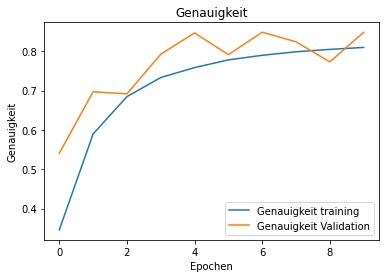

In [16]:
# Genauigkeit
plt.figure(0)
plt.plot(history.history['accuracy'], label='Genauigkeit training')
plt.plot(history.history['val_accuracy'], label='Genauigkeit Validation')
plt.title('Genauigkeit')
plt.xlabel('Epochen')
plt.ylabel('Genauigkeit')
plt.legend()
plt.show()

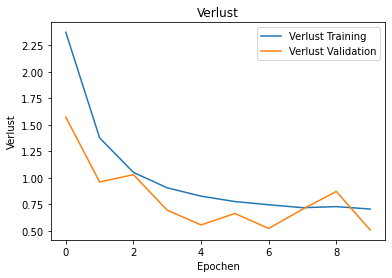

In [17]:
# Verlust
plt.plot(history.history['loss'], label='Verlust Training')
plt.plot(history.history['val_loss'], label='Verlust Validation')
plt.title('Verlust')
plt.xlabel('Epochen')
plt.ylabel('Verlust')
plt.legend()
plt.show()

# mit Testdatensatz Genauigkeit testen

In [18]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [ ]:
X_test, label = testing('C:/Users/Basti/Documents/Projekt_Neuronale Netze/Data_image/data/Test.csv')

# Genauigkeit berechnen

In [ ]:
#MLP:
Y_pred = model.predict_classes(X_test)
Y_pred

from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

# Model speichern

In [ ]:
model.save("./training/TSR_mlp.h5")

# Model laden

In [ ]:
import os
os.chdir(r'C:/Users/Basti/Documents/Projekt_Neuronale Netze/Traffic_Sign_mlp')
from keras.models import load_model
model = load_model('./training/TSR_mlp.h5')

In [ ]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

# Test mit Einfügen von Bildern

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

In [ ]:
plot,prediction = test_on_img(r'C:/Users/Basti/Documents/Projekt_Neuronale Netze/Traffic_Sign_mlp/Test/00807.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Das Verkehrszeichen sagt: ", classes[a])
print("Bild anzeigen:")
plt.imshow(plot)
plt.show()